# Introduction 

This project tries to analyse rail traffic disruptions, namely train delays caused by bad weather. 

In [1]:
install.packages("brms")
install.packages("tidyverse")
install.packages("anytime")


The downloaded binary packages are in
	/var/folders/_y/7131d4pj4xb35rq955c6z6w80000gn/T//Rtmp8Evrax/downloaded_packages


also installing the dependencies ‘highr’, ‘xfun’, ‘rematch’, ‘knitr’, ‘tinytex’, ‘DBI’, ‘curl’, ‘cellranger’, ‘clipr’, ‘fs’, ‘rmarkdown’, ‘whisker’, ‘selectr’, ‘broom’, ‘dbplyr’, ‘forcats’, ‘haven’, ‘hms’, ‘httr’, ‘lubridate’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’, ‘tidyr’, ‘xml2’




The downloaded binary packages are in
	/var/folders/_y/7131d4pj4xb35rq955c6z6w80000gn/T//Rtmp8Evrax/downloaded_packages


also installing the dependency ‘RApiDatetime’




The downloaded binary packages are in
	/var/folders/_y/7131d4pj4xb35rq955c6z6w80000gn/T//Rtmp8Evrax/downloaded_packages


Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: Rcpp
Loading 'brms' package (version 2.6.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').
Run theme_set(theme_default()) to use the default bayesplot theme.


In [3]:
require(lubridate)
library(anytime)
library(ggplot2)
library(brms)
theme_set(theme_minimal())

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: Rcpp
Loading 'brms' package (version 2.6.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').
Run theme_set(theme_default()) to use the default bayesplot theme.


In [12]:
iter <- 500
data_file <- "data/tiny_filtered.csv"
# data_file <- "data/2010q1_filtered.csv"
val_data_file <- "data/validation.csv"

In [1]:
df <- read.csv(data_file)
df$datetime <- anytime::anytime(df$time)

# Description of the data, and the analysis problem

Desciption of the field in the dataframe:
```
time:                start time of one hour interval
trainstation:        train station short code
train_type:          K -> inter city
                     L -> commuter
                     T -> cargo
                     M -> other
train_count:         amount of trains passed the station during the particular hour
total_delay:         amount of delay at the end station of the train
delay:               amount of delay between previous and current station
name:                observation station name
lat:                 train station latitude
lon:                 train station longitude
pressure:            air pressure (hPa)
max_temperature:     maximum temperature during the time interval (C)
min_temperature:     minimum temperature (C)
mean_temperature:    mean temperature (C)
mean_dewpoint:       mean dew point (C)
mean_humidity:       mean humidity (percents)
mean_winddirection:  mean wind direction (degrees)
mean_windspeedms:    mean wind speed (m/s), 
max_windgust:        maximum wind gust (m/s)
max_precipitation1h: 1 hour precipitation accumulation (mm)
max_snowdepth:       maximum snow depth (cm)
max_n:               maximum cloudiness (1/8)
min_vis:             minimum visibility (m) 
min_clhb:            minimum cloud base height (m)
max_precipitation3h: 3 hour precipitation accumulation (mm)
max_precipitation6h: 6 hour precipitation accumulation (mm)
flashcount:          flash count with 30 km radius from the train station
```
\- 99 stands for missing value

In [3]:
head(df)
tail(df)
dim(df)

X,time,trainstation,train_type,train_count,total_delay,delay,name,lat,lon,⋯,max_windgust,max_precipitation1h,max_snowdepth,max_n,min_vis,min_clhb,max_precipitation3h,max_precipitation6h,flashcount,datetime
1287675,2010-01-01 00:00:00 UTC,HKH,L,1,0,11,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,9,0,41,8,6110,1300,0,0,0,2010-01-01
1283303,2010-01-01 00:00:00 UTC,HKH,K,1,0,0,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,9,0,41,8,6110,1300,0,0,0,2010-01-01
1284384,2010-01-01 00:00:00 UTC,HKH,L,2,0,1,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,9,0,41,8,6110,1300,0,0,0,2010-01-01
1296206,2010-01-01 00:00:00 UTC,HKI,K,1,1,0,Kaisaniemi,60.1752,24.94459,⋯,9,0,26,8,3440,210,0,0,0,2010-01-01
1296264,2010-01-01 00:00:00 UTC,HKI,L,1,0,16,Kaisaniemi,60.1752,24.94459,⋯,9,0,26,8,3440,210,0,0,0,2010-01-01
1296340,2010-01-01 00:00:00 UTC,HKI,L,3,0,12,Kaisaniemi,60.1752,24.94459,⋯,9,0,26,8,3440,210,0,0,0,2010-01-01


,X,time,trainstation,train_type,train_count,total_delay,delay,name,lat,lon,⋯,max_windgust,max_precipitation1h,max_snowdepth,max_n,min_vis,min_clhb,max_precipitation3h,max_precipitation6h,flashcount,datetime
53407,65131,2010-01-09 23:00:00 UTC,VKS,L,2,0,0,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,3,0,42,9,370,50,0,0,0,2010-01-09 23:00:00
53408,22635,2010-01-09 23:00:00 UTC,VMO,K,1,0,0,Kumpula,60.2031,24.96131,⋯,2,0,39,9,300,30,0,0,0,2010-01-09 23:00:00
53409,23969,2010-01-09 23:00:00 UTC,VMO,L,1,0,0,Kumpula,60.2031,24.96131,⋯,2,0,39,9,300,30,0,0,0,2010-01-09 23:00:00
53410,22966,2010-01-09 23:00:00 UTC,VMO,L,1,0,1,Kumpula,60.2031,24.96131,⋯,2,0,39,9,300,30,0,0,0,2010-01-09 23:00:00
53411,1321539,2010-01-09 23:00:00 UTC,VTI,K,2,0,48,Ruukki,64.6842,25.08919,⋯,2,0,27,-99,-99,-99,0,0,0,2010-01-09 23:00:00
53412,63995,2010-01-09 23:00:00 UTC,YLÖ,K,1,1,17,Tampere-Pirkkalan lentoasema,61.4184,23.61811,⋯,1,-99,-99,9,100,30,-99,-99,0,2010-01-09 23:00:00


[1] 53412    28

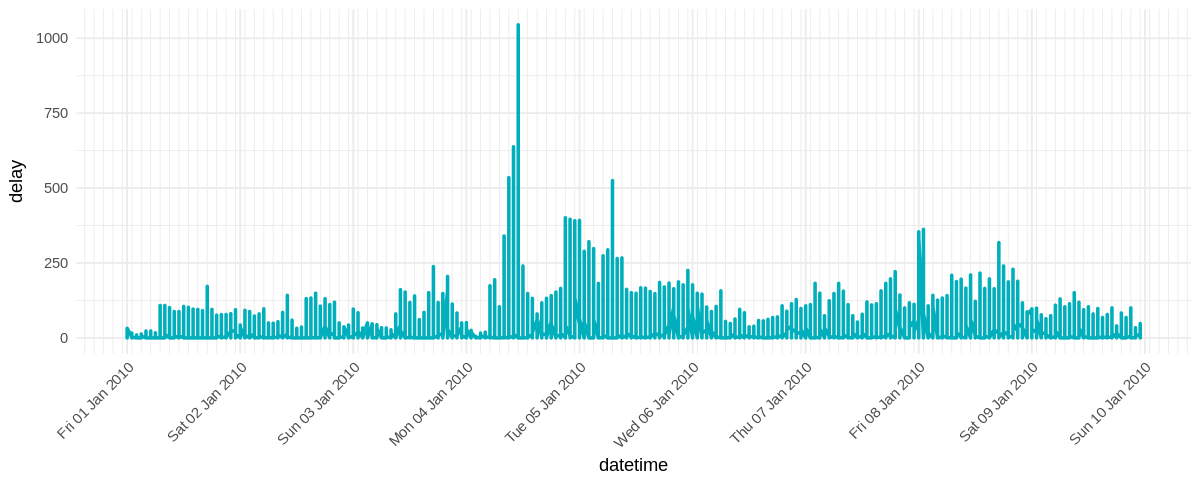

In [4]:
library(scales)
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = datetime, y = delay))+
  geom_line(color = "#00AFBB", size = 1) +
  scale_x_datetime(date_labels = "%a %d %b %Y", breaks = date_breaks("1 day"),
  minor_breaks = date_breaks("2 hour")) +
  theme(axis.text.x=element_text(angle=45, hjust=1))

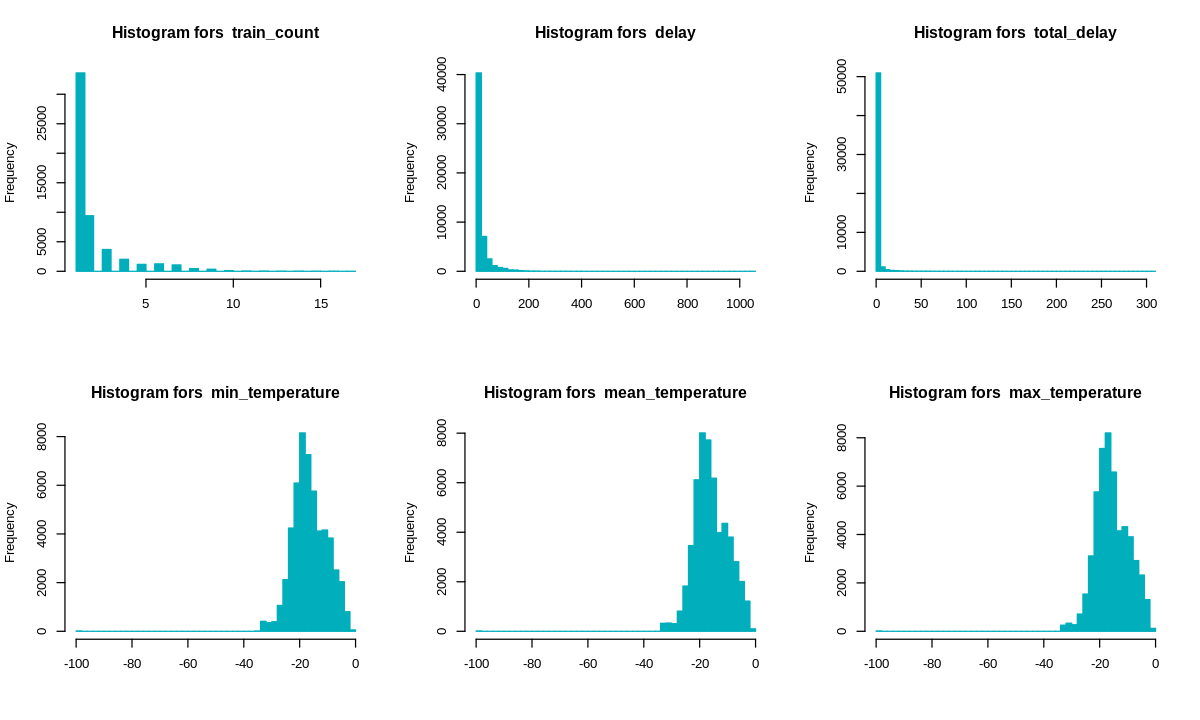

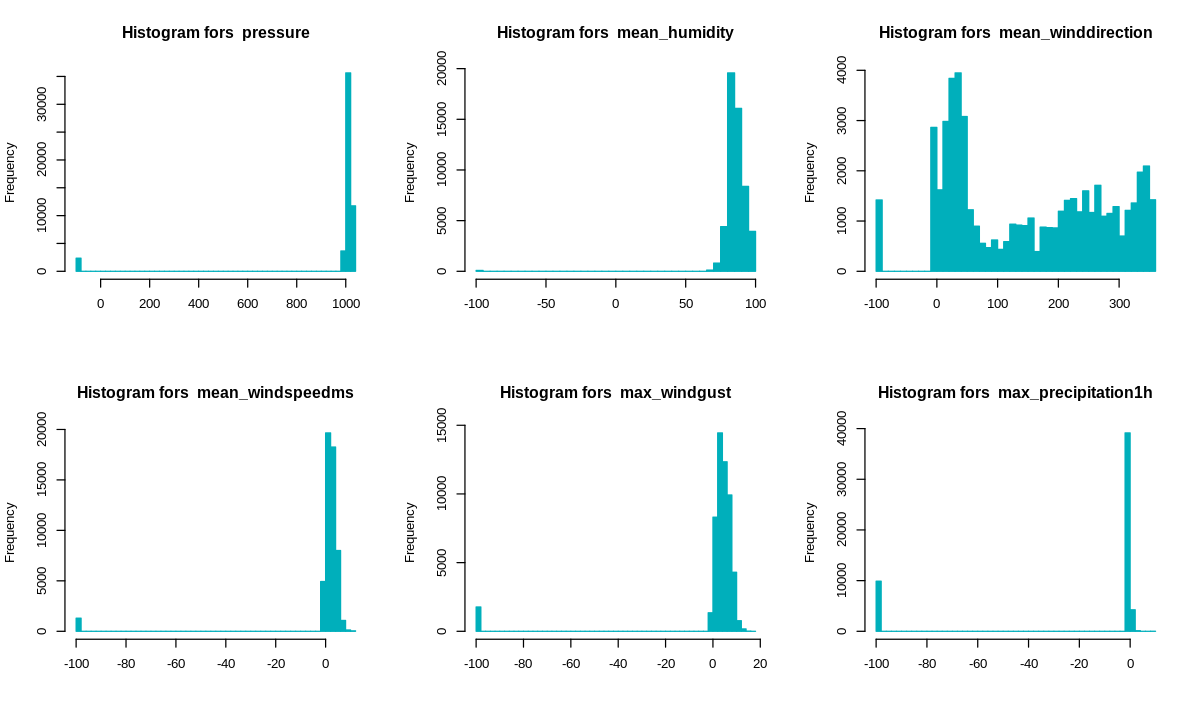

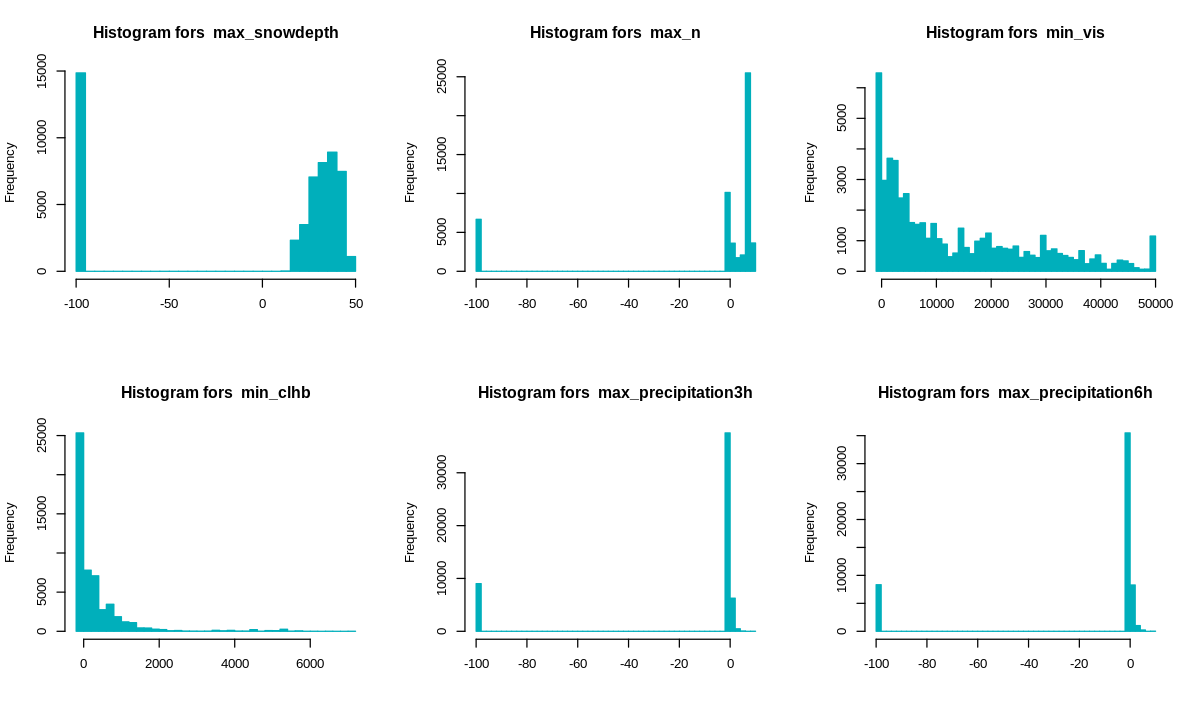

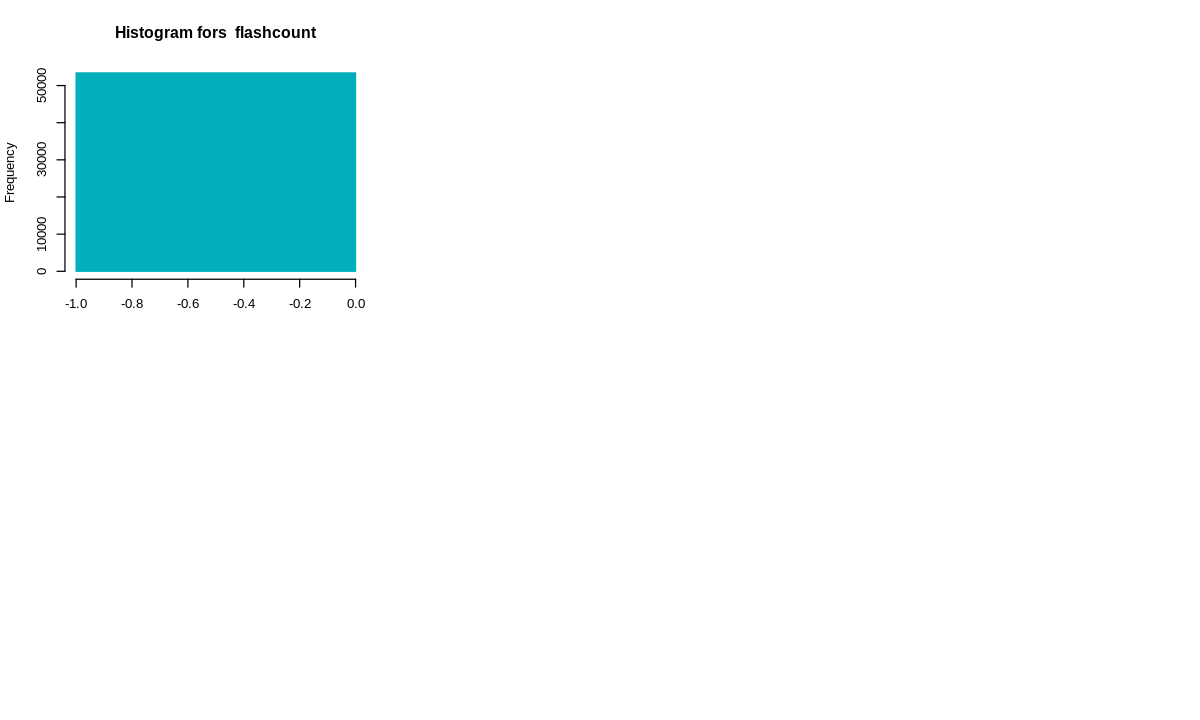

In [5]:
library(reshape2)
cols = c('train_count', 'delay', 'total_delay', 
         'min_temperature', 'mean_temperature', 
         'max_temperature', 'pressure', 'mean_humidity', 
         'mean_winddirection', 'mean_windspeedms', 'max_windgust', 
         'max_precipitation1h', 'max_snowdepth', 'max_n', 
         'min_vis', 'min_clhb', 'max_precipitation3h', 
         'max_precipitation6h', 'flashcount')
#ggplot(melt(df, id=cols), aes(x = value)) + 
#    facet_wrap(~ variable, scales = "free", ncol = 2) + 
#    geom_histogram(binwidth = .5)
par(mfrow=c(2,3))
options(repr.plot.width=10, repr.plot.height=6)
#subset(df, 'max_snowdepth'!=-99)
for (col in cols){
#    ggplot(df, aes(data)) + 
#      facet_wrap(~ col, scales = "free", ncol = 2) + 
#      geom_histogram(stat="count")
    hist(subset(df, col != -99)[,col],
         main=paste("Histogram fors ",col),
         xlab='', col='#00AFBB', border='#00AFBB',
         breaks=50)
}


Histograms for all rows where delay between stations have been over 5 minutes.

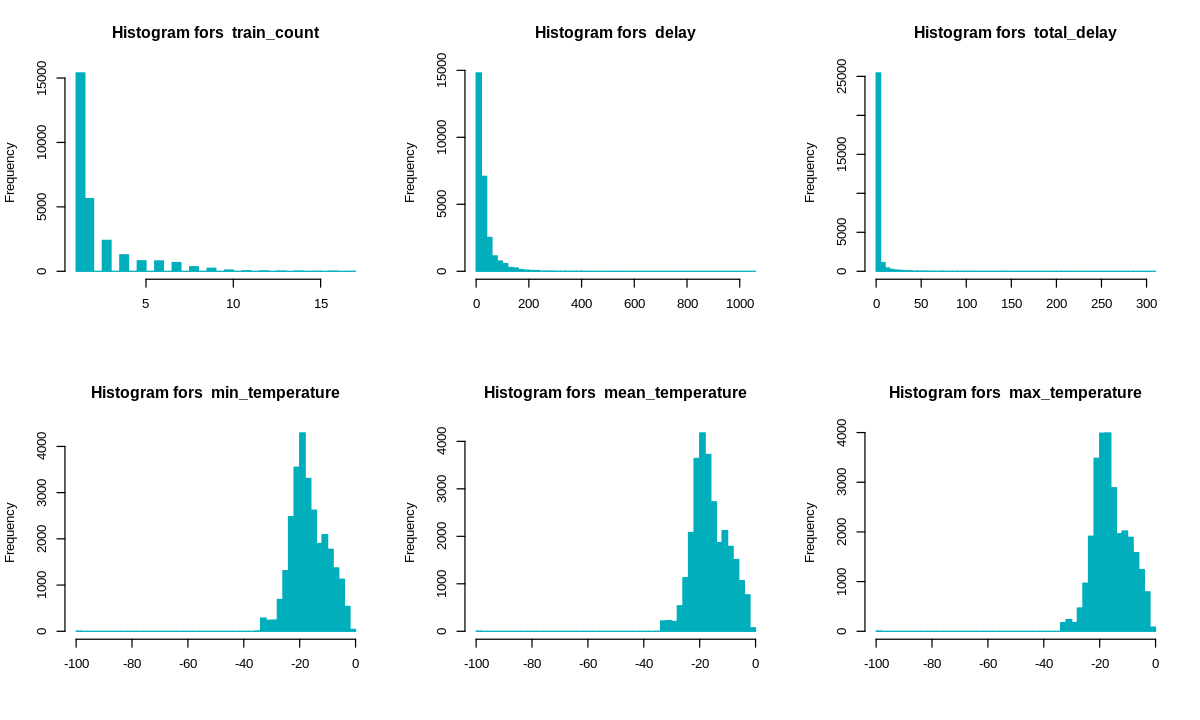

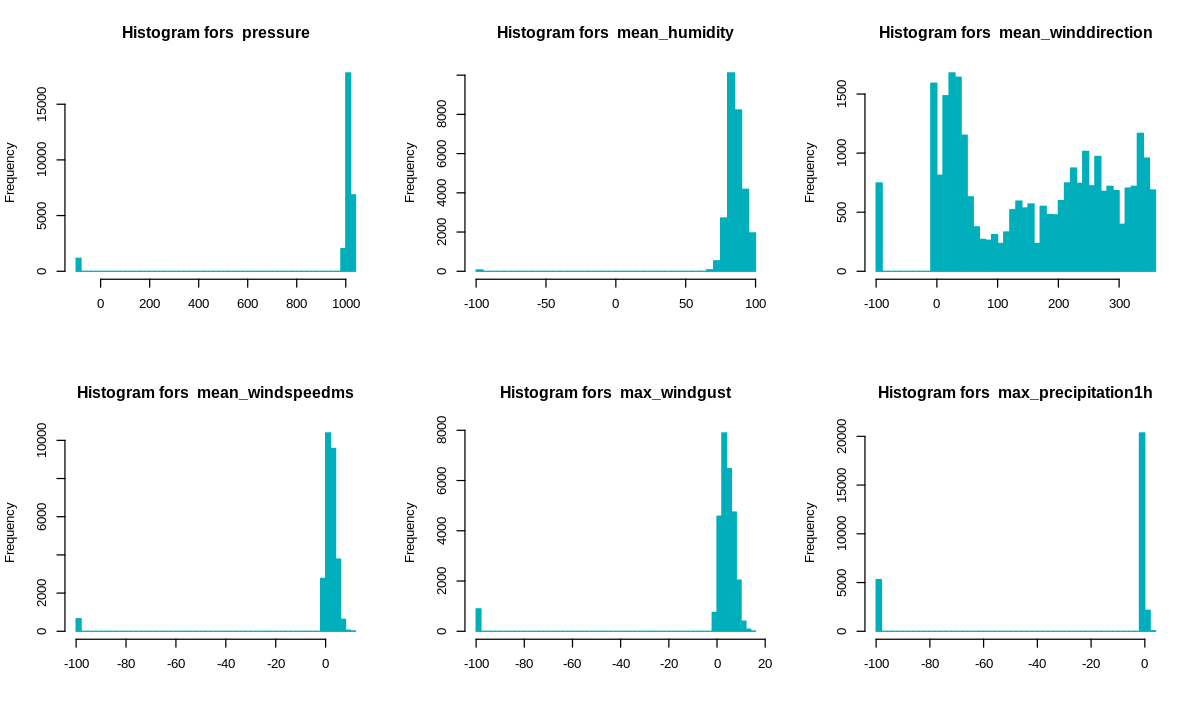

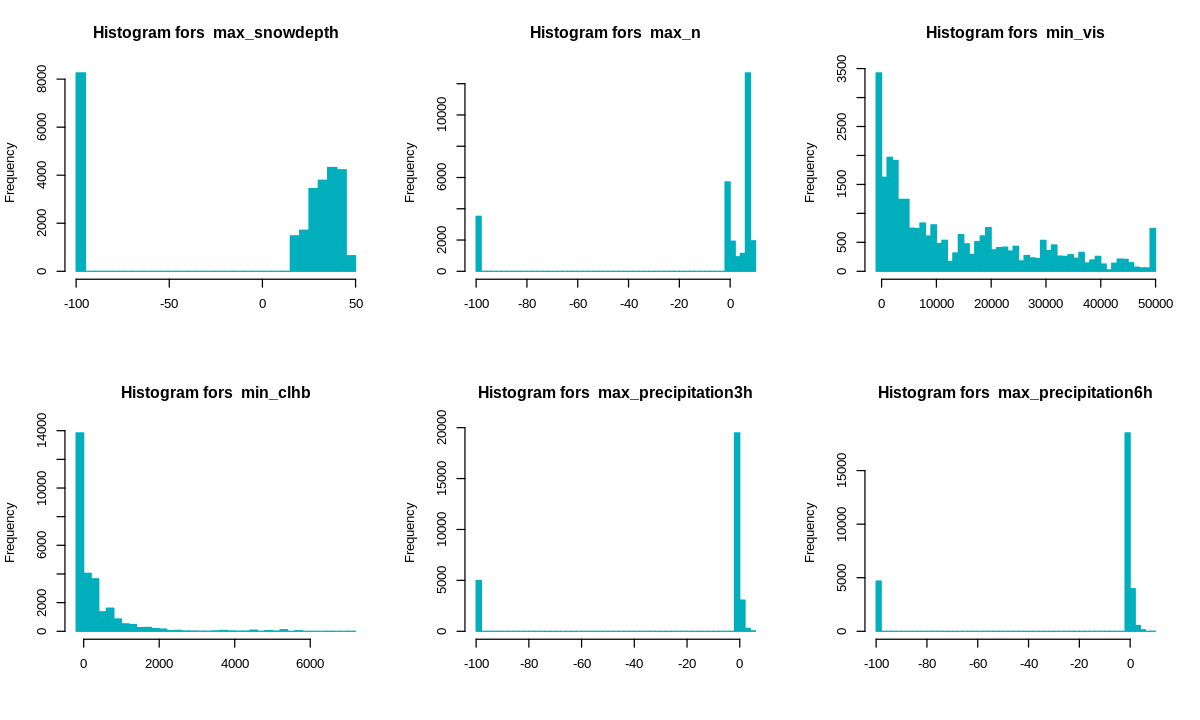

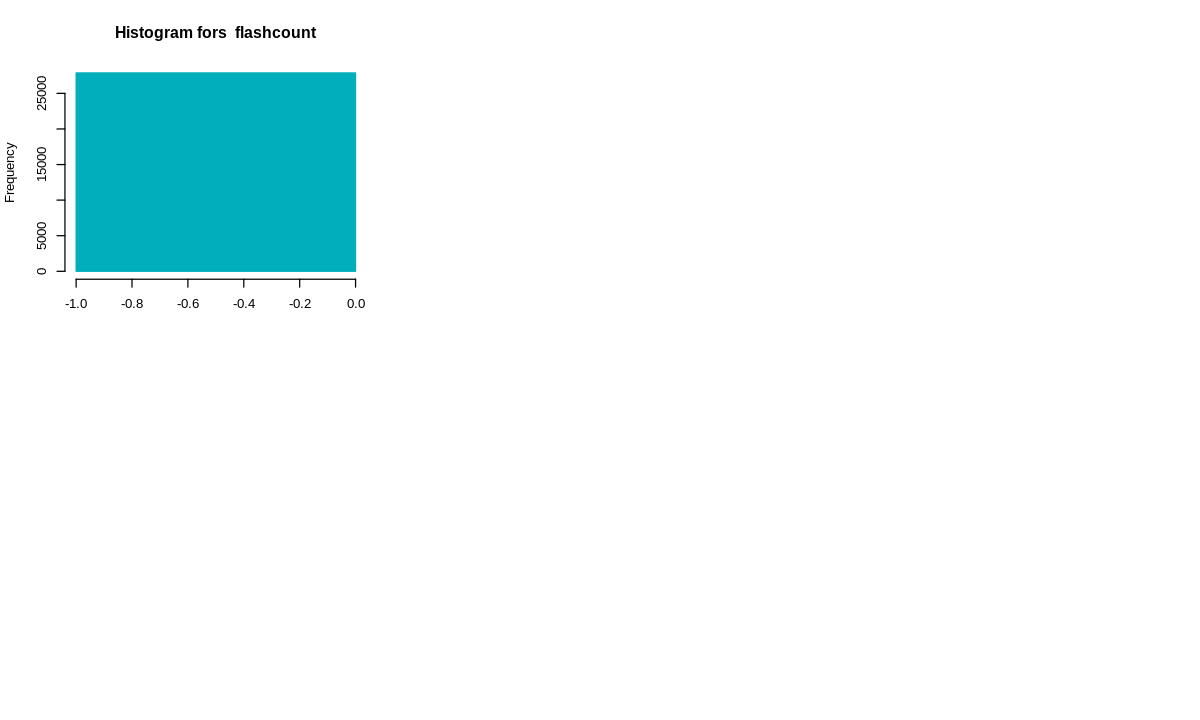

In [6]:
df_delay <- df[df$delay > 5,]
par(mfrow=c(2,3))
for (col in cols){
    hist(subset(df_delay, col != -99)[,col],
         main=paste("Histogram fors ",col),
         xlab='', col='#00AFBB', border='#00AFBB',
         breaks=50)
}

# Description of the model
...

# Description of the prior choices
...

# Stan
...

In [4]:
options(mc.cores = parallel::detectCores())
fit1 <- brm(
    cbind(delay) ~ (1|p|min_temperature) + (1|q|pressure),
    data = df,
    n.iter = iter
)

Compiling the C++ model
Start sampling


# Convergence diagnostics
...

In [5]:
summary(fit1)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: cbind(delay) ~ (1 | p | min_temperature) + (1 | q | pressure) 
   Data: df (Number of observations: 53412) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~min_temperature (Number of levels: 36) 
              Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sd(Intercept)     6.75      0.92     5.18     8.79        582 1.00

~pressure (Number of levels: 45) 
              Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sd(Intercept)     9.18      1.03     7.43    11.52        371 1.01

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept    19.68      1.81    16.37    23.29        275 1.01

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma    30.19      0.09    30.00    30.37       5135 1.00

Samples were drawn using sampling(NUTS). Fo

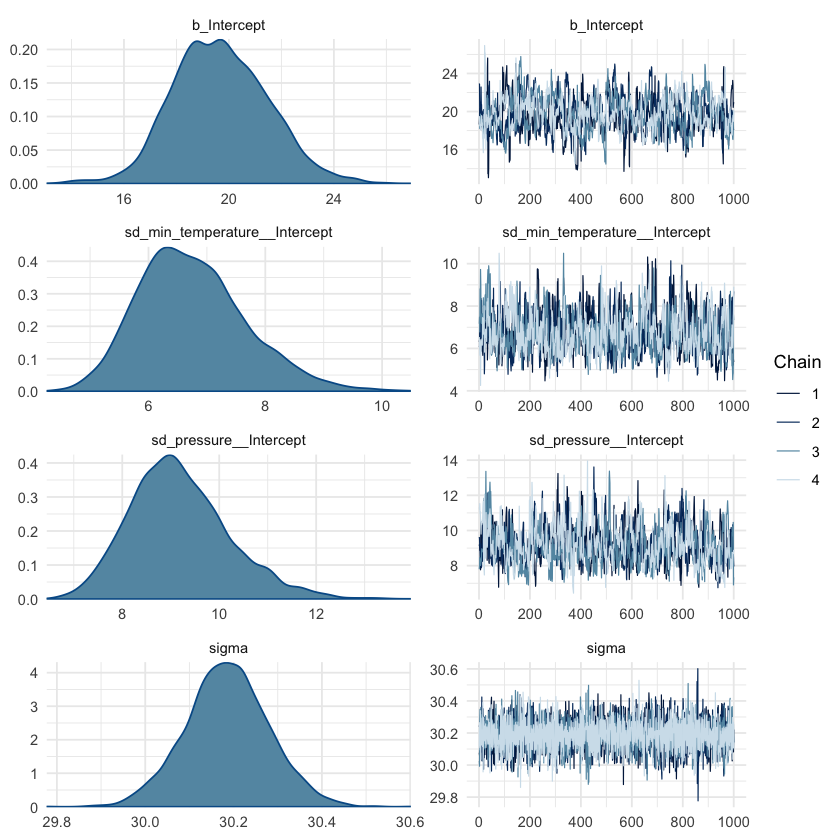

In [6]:
plot(fit1)

# Posterior predictive checking
...

# Model comparison
...

# Predictive performance assessment
...

In [13]:
validation <- read.csv(val_data_file)
validation$datetime <- anytime::anytime(validation$time)

In [17]:
val_data <- validation[,c('min_temperature', 'pressure')]
pred <- predict(fit1, newdata = val_data, re_formula = NA)
pred

Estimate,Est.Error,Q2.5,Q97.5
19.32364,30.70368,-42.12017,79.50069
20.13648,30.56291,-39.98604,80.42149
19.75428,30.47403,-38.11033,77.95652
19.05937,30.50605,-39.83392,79.56850
19.53992,29.87523,-37.64736,78.07696
20.30387,29.92695,-37.12479,78.39622
19.79343,30.53798,-39.51272,81.00668
19.88740,30.91482,-40.98536,81.10804
18.90655,29.82712,-42.28591,75.65648
19.74978,29.86842,-39.93404,78.77547


    Estimate       Est.Error          Q2.5            Q97.5      
 Min.   :17.62   Min.   :28.75   Min.   :-45.06   Min.   :73.19  
 1st Qu.:19.36   1st Qu.:30.01   1st Qu.:-40.38   1st Qu.:78.02  
 Median :19.68   Median :30.24   Median :-39.51   Median :78.87  
 Mean   :19.68   Mean   :30.24   Mean   :-39.52   Mean   :78.88  
 3rd Qu.:20.01   3rd Qu.:30.46   3rd Qu.:-38.66   3rd Qu.:79.74  
 Max.   :21.64   Max.   :31.64   Max.   :-34.61   Max.   :84.50  

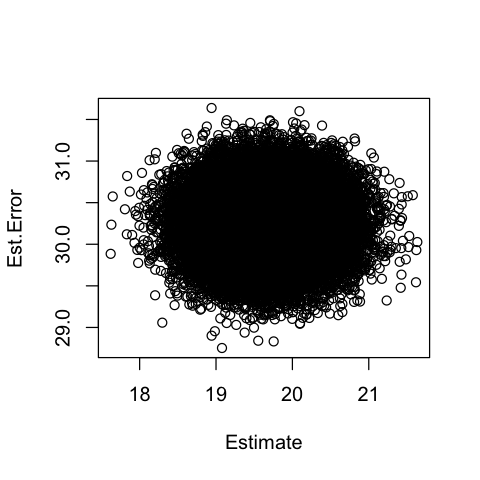

In [18]:
options(repr.plot.width=4, repr.plot.height=4)
summary(pred)
plot(pred)

time,delay,estimate,lower,upper
2011-01-05 07:00:00,1,19.32364,-42.12017,79.50069
2011-01-04 13:00:00,0,20.13648,-39.98604,80.42149
2011-01-05 22:00:00,19,19.75428,-38.11033,77.95652
2011-01-05 16:00:00,2,19.05937,-39.83392,79.56850
2011-01-05 08:00:00,0,19.53992,-37.64736,78.07696
2011-01-03 09:00:00,0,20.30387,-37.12479,78.39622
2011-01-05 22:00:00,1,19.79343,-39.51272,81.00668
2011-01-05 13:00:00,13,19.88740,-40.98536,81.10804
2011-01-06 22:00:00,0,18.90655,-42.28591,75.65648
2011-01-05 18:00:00,7,19.74978,-39.93404,78.77547


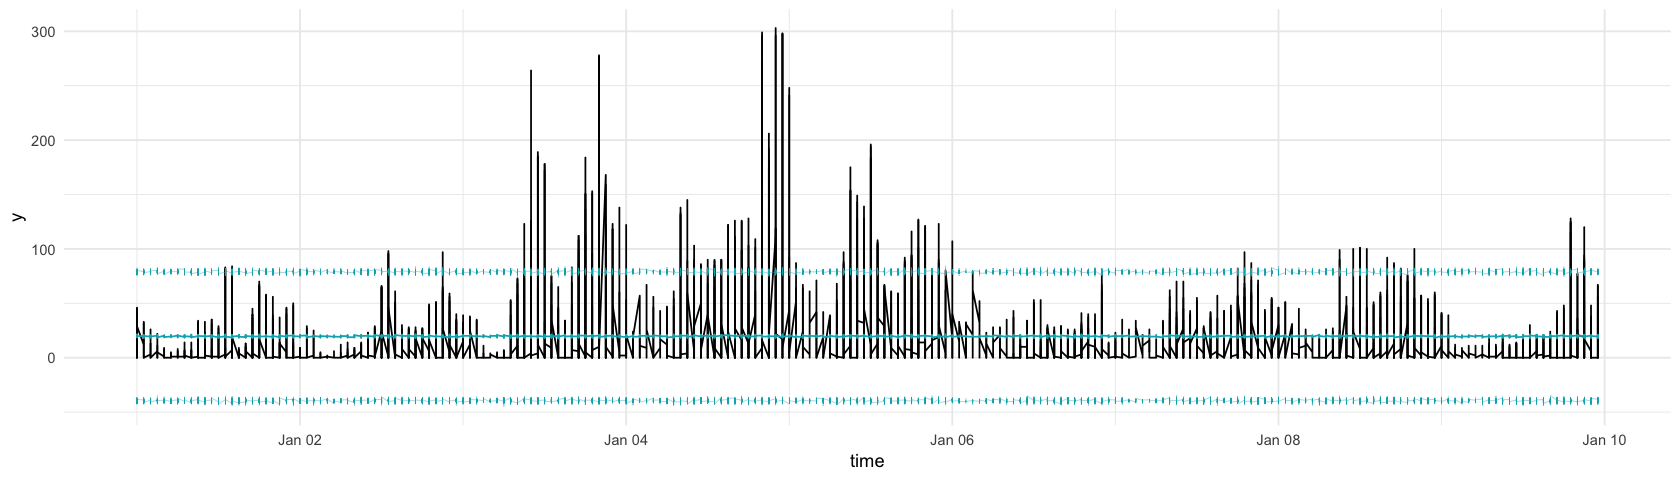

In [47]:
options(repr.plot.width=14, repr.plot.height=4)
val_times <- validation[,c('datetime','delay')]
fitval <- data.frame(cbind(val_times,pred[,-2]))
names(fitval) <- c("time", "delay", "estimate", "lower", "upper")
fitval
#fitval
ggplot(data=fitval, aes(x = time, y = 'delay')) +
#    geom_point(shape = 1) +
    geom_line(data = fitval, aes(y = delay), size = 0.5) +
    geom_line(data = fitval, aes(y = lower), size = 0.11, col='#00AFBB') +
    geom_line(data = fitval, aes(y = upper), size = 0.11, col='#00AFBB') +
    geom_line(data = fitval, aes(y = estimate), size = 0.5, col='#00AFBB')


# Sensitivity analysis
...

# Discussion of problems, and potential improvements
...